# Stabla olucivanja

In [1]:
import pandas as pd
import numpy as np

## Podaci

In [2]:
df = pd.read_csv("../data/iris.csv")
df

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
df.describe(include="all")

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


Provera da li postoje neke nepostojaće vrednosti:

In [4]:
df.isna().any().any()

False

In [5]:
features = df.columns.tolist()[0:-1]
x = df[features]
y = df['Species']

## Preprocesiranje

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, stratify=y)

## Treniranje modela

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
import matplotlib.pyplot as plt

In [10]:
dt = DecisionTreeClassifier(max_depth=4)
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [11]:
dt.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

## Mera kvaliteta modela

In [12]:
from sklearn.tree import plot_tree

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Važnost svakoe od karakteristika za proces klasifikacije:

In [14]:
dt.feature_importances_
pd.Series(dt.feature_importances_, index=features)

Sepal_Length    0.000000
Sepal_Width     0.019048
Petal_Length    0.062652
Petal_Width     0.918301
dtype: float64

Sa kojom verovatnoćom je klasifikovao svaku od instanci iz test skupa:

In [15]:
pd.DataFrame(dt.predict_proba(x_train), columns=dt.classes_).head()

,setosa,versicolor,virginica
0,0.0,1.0,0.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,0.0,1.0,0.0
4,0.0,0.0,1.0


In [16]:
def calculate_metrics(data, true_values, clf):
    y_pred = clf.predict(data)
    print("Accuracy: " + str(accuracy_score(true_values, y_pred)))
    print()
    print("Confusion matrix:")
    print(pd.DataFrame(confusion_matrix(true_values, y_pred), index=clf.classes_, columns=clf.classes_))
    print()
    print("Report:")
    print(classification_report(true_values, y_pred))

In [17]:
calculate_metrics(x_train, y_train, dt)

Accuracy: 1.0

Confusion matrix:
            setosa  versicolor  virginica
setosa          35           0          0
versicolor       0          35          0
virginica        0           0         35

Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        35
  versicolor       1.00      1.00      1.00        35
   virginica       1.00      1.00      1.00        35

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105



In [18]:
calculate_metrics(x_test, y_test, dt)

Accuracy: 0.9333333333333333

Confusion matrix:
            setosa  versicolor  virginica
setosa          15           0          0
versicolor       0          14          1
virginica        0           2         13

Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      0.93      0.90        15
   virginica       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



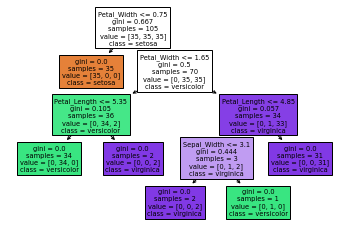

In [19]:
t = plot_tree(dt, feature_names=features, class_names=dt.classes_, filled=True)

In [20]:
# Cuvanje dijagrama
# plt.figure()
# t1 = plot_tree(dt1, feature_names=features, class_names=dt.classes_, filled=True)
# plt.savefig('data/tree.jpg',format='jpg',bbox_inches = "tight")

## Odabir najboljeg modela

In [21]:
from sklearn.model_selection import GridSearchCV

In [22]:
parameters = {'criterion' : ['gini', 'entropy'],
              'max_depth': [2,3,4],
              'min_samples_leaf': [2,4]}

model = GridSearchCV(DecisionTreeClassifier(), param_grid=parameters, scoring='accuracy', cv=5)

In [23]:
model.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4], 'min_samples_leaf': [2, 4]},
             scoring='accuracy')

In [24]:
model.best_params_

{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 2}

In [25]:
model.best_score_

0.9714285714285715

In [26]:
y_predicted = model.predict(x_test)

In [27]:
confusion_matrix(y_test, y_predicted)

array([[15,  0,  0],
       [ 0, 14,  1],
       [ 0,  2, 13]])